In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

# Phase 1-1
## 1-1A

Data is saved in 4 csv files: connections, devices, processes, profiles. One row = one entry. Separator is tab. Key connecting all tables is imei, which means a unique device identifier. 

In [4]:
connections, devices, processes, profiles = pd.read_csv('data/connections.csv', sep='\t'), pd.read_csv('data/devices.csv', sep='\t'), pd.read_csv('data/processes.csv', sep='\t'), pd.read_csv('data/profiles.csv', sep='\t')

### Connections
Initially we print the first few rows of the connections table to get a sense of the data.

In [5]:
connections.head()

,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.raider,c.android.vending,c.UCMobile.intl,c.UCMobile.x86,c.updateassist
0,2018-05-05 10:00:00,3590433799317661107,0.0,11.65403,10.65335,10.48791,16.91620,5.04564,36.21508,14.24956,4.09319,15.20934,5.11764
1,2018-05-05 10:01:00,3590433799317662063,1.0,10.29551,10.46363,10.98438,15.65637,14.82931,24.83765,57.49911,23.94919,8.82448,44.13570
2,2018-05-05 10:02:00,863033069630348313,0.0,12.12831,9.53752,6.78080,6.98948,10.92433,3.29441,20.37891,52.55353,49.51037,99.75215
3,2018-05-05 10:03:00,359043379931766114,1.0,11.06419,11.55759,8.87744,11.84499,15.45902,24.78878,36.40299,25.77644,21.84167,65.17774
4,2018-05-05 10:04:00,3590433799317661842,1.0,12.08457,10.42860,9.82241,12.48869,12.85363,40.98237,74.13316,96.77450,18.48116,90.77304


We analyze the structure of the table.

In [25]:
print(f"There are {connections.shape[0]} entries with {connections.shape[1]} columns:\n {connections.columns.values}")

There are 15074 entries with 13 columns:
 ['ts' 'imei' 'mwra' 'c.android.youtube' 'c.dogalize' 'c.android.gm'
 'c.katana' 'c.android.chrome' 'c.raider' 'c.android.vending'
 'c.UCMobile.intl' 'c.UCMobile.x86' 'c.updateassist']


In [23]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15074 entries, 0 to 15073
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15074 non-null  object 
 1   imei               15074 non-null  int64  
 2   mwra               15074 non-null  float64
 3   c.android.youtube  15074 non-null  float64
 4   c.dogalize         15074 non-null  float64
 5   c.android.gm       15074 non-null  float64
 6   c.katana           15074 non-null  float64
 7   c.android.chrome   15074 non-null  float64
 8   c.raider           15074 non-null  float64
 9   c.android.vending  15074 non-null  float64
 10  c.UCMobile.intl    15074 non-null  float64
 11  c.UCMobile.x86     15074 non-null  float64
 12  c.updateassist     15074 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


This dataset contains no missing values, as the number of non-null entries in each column matches the total row count. The first column holds object type values, representing timestamps, and will likely be converted to timestamp type during further processing. The second column stores int64 values, which represent the International Mobile Equipment Identity (IMEI) number. The third column is of type float64 despite containing only boolean values, which indicate malware-related activity. The other columns are of type float64  serving as input for evaluating mwra. 

The pair of first and second column (ts, imei) are keys for snapshot of the rest of values. The third column is the result of evaluation. 

In [27]:
connections.describe()

,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.raider,c.android.vending,c.UCMobile.intl,c.UCMobile.x86,c.updateassist
count,1.507400e+04,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000
mean,3.944186e+18,0.628367,10.649835,11.159652,9.960639,11.779597,9.983044,49.518952,50.033587,50.042579,49.858606,49.845721
std,3.331167e+18,0.483257,2.541594,2.787612,2.564320,2.332968,2.609872,28.933385,28.855641,28.955827,29.024959,28.848587
min,3.590434e+17,0.000000,1.023410,0.113470,0.022370,2.299720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,8.759405,9.342795,8.119385,10.424308,8.128787,24.551032,24.985702,24.950173,24.570863,24.762352
50%,3.590434e+18,1.000000,10.527030,11.410130,9.868480,12.011270,9.935055,49.285175,50.404290,50.368725,49.839325,49.573495
75%,8.630331e+18,1.000000,12.507920,13.140740,11.798052,13.362262,11.872960,74.746440,75.024978,74.937760,75.378667,74.872277
max,8.630331e+18,1.000000,20.726030,19.477060,18.284120,19.684410,19.927250,100.000000,100.000000,100.000000,100.000000,100.000000


From the method above, we can get a sense of distributions for each column. Especially mean close to the median suggest normal distribution.

### Devices

In [ ]:
devices.head()

In [28]:
print(f"There are {devices.shape[0]} entries with {devices.shape[1]} columns:\n {devices.columns.values}")


There are 2895 entries with 6 columns:
 ['latitude' 'longitude' 'store_name' 'code' 'location' 'imei']


In [10]:
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2895 non-null   float64
 1   longitude   2895 non-null   float64
 2   store_name  2895 non-null   object 
 3   code        2892 non-null   object 
 4   location    2895 non-null   object 
 5   imei        2895 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 135.8+ KB


Column 'code' has 3 null values. Others don't have any. 

In [9]:
devices.describe()

,latitude,longitude,imei
count,2895.000000,2895.000000,2.895000e+03
mean,29.379861,9.846564,3.919073e+18
std,23.348693,73.262963,3.333461e+18
min,-54.800000,-156.474320,3.590434e+17
25%,14.933330,-60.931730,8.630331e+17
50%,36.766390,9.152140,3.590434e+18
75%,46.655810,71.211690,8.630331e+18
max,68.798330,178.004170,8.630331e+18


Latitude and longitude often act more as a categorical data instead of numerical, when it comes to analysis, as they split into categories rather than attributes growing in a linear fashion. IMEI is an id. Therefore the cell above provides no useful insight.

In [11]:
processes.head()

,ts,imei,mwra,p.android.chrome,p.android.documentsui,p.android.gm,p.system,p.android.packageinstaller,p.android.settings,p.android.externalstorage,...,p.dogalize,p.simulator,p.google,p.android.vending,p.inputmethod.latin,p.process.gapps,p.notifier,p.olauncher,p.gms.persistent,p.android.defcontainer
0,2018-05-05 10:00:00,3590433799317661107,0.0,7.41473,10.17656,14.80917,12.14702,11.55620,8.33912,14.02450,...,65.61120,50.11483,53.37584,68.21001,61.69014,42.31022,4.82212,90.97861,53.94759,20.98954
1,2018-05-05 10:01:00,3590433799317662063,1.0,9.40603,6.57378,6.06519,10.56643,16.74062,13.78434,7.57297,...,47.85939,64.64494,15.73793,58.42507,57.04862,40.09440,16.63539,30.11126,40.51207,64.61017
2,2018-05-05 10:02:00,863033069630348313,0.0,13.61225,11.73312,8.99679,10.79425,12.60312,10.78121,11.90788,...,52.33884,25.01553,42.88480,17.22521,13.74976,50.38813,42.62046,96.70838,43.37143,98.71501
3,2018-05-05 10:03:00,359043379931766114,1.0,8.14970,9.53996,8.28249,10.80629,13.97670,12.73047,11.64714,...,28.18437,55.22909,59.59616,78.03742,20.18875,20.99686,90.73121,86.05335,99.16606,95.92975
4,2018-05-05 10:04:00,3590433799317661842,1.0,8.20358,8.94156,8.62248,8.33003,13.44049,13.31239,11.40689,...,71.31165,60.24955,52.48479,13.37139,51.12877,70.85514,39.65245,29.01586,6.11403,65.87936


In [29]:
print(f"There are {processes.shape[0]} entries with {processes.shape[1]} columns:\n {processes.columns.values}")

There are 15074 entries with 23 columns:
 ['ts' 'imei' 'mwra' 'p.android.chrome' 'p.android.documentsui'
 'p.android.gm' 'p.system' 'p.android.packageinstaller'
 'p.android.settings' 'p.android.externalstorage' 'p.android.gms'
 'p.katana' 'p.browser.provider' 'p.dogalize' 'p.simulator' 'p.google'
 'p.android.vending' 'p.inputmethod.latin' 'p.process.gapps' 'p.notifier'
 'p.olauncher' 'p.gms.persistent' 'p.android.defcontainer']


In [13]:
processes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15074 entries, 0 to 15073
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15074 non-null  object 
 1   imei                        15074 non-null  int64  
 2   mwra                        15074 non-null  float64
 3   p.android.chrome            15074 non-null  float64
 4   p.android.documentsui       15074 non-null  float64
 5   p.android.gm                15074 non-null  float64
 6   p.system                    15074 non-null  float64
 7   p.android.packageinstaller  15074 non-null  float64
 8   p.android.settings          15074 non-null  float64
 9   p.android.externalstorage   15074 non-null  float64
 10  p.android.gms               15074 non-null  float64
 11  p.katana                    15074 non-null  float64
 12  p.browser.provider          15074 non-null  float64
 13  p.dogalize                  150

Same as the connections table, there are no null values in any columns. Other details are also the same as in the connections table.

In [12]:
processes.describe()

,imei,mwra,p.android.chrome,p.android.documentsui,p.android.gm,p.system,p.android.packageinstaller,p.android.settings,p.android.externalstorage,p.android.gms,...,p.dogalize,p.simulator,p.google,p.android.vending,p.inputmethod.latin,p.process.gapps,p.notifier,p.olauncher,p.gms.persistent,p.android.defcontainer
count,1.507400e+04,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,...,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000
mean,3.944186e+18,0.628367,10.624031,10.088090,9.428202,10.055861,12.395920,11.247557,11.242832,47.251979,...,50.848156,45.156014,49.467709,49.666323,49.639707,50.260145,50.290151,49.752762,49.817193,49.571407
std,3.331167e+18,0.483257,2.580956,2.380393,2.392442,2.646287,1.841499,2.572235,2.766107,12.825330,...,13.234067,11.425622,13.496016,28.950774,28.891075,28.812835,28.812182,28.678112,28.951400,29.061716
min,3.590434e+17,0.000000,1.596390,3.929200,1.529690,0.051170,5.165220,1.636750,1.918450,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,8.704740,8.362568,7.834278,8.189795,11.167677,9.465430,9.340640,38.517235,...,41.845320,37.395083,40.257945,24.730168,24.392198,25.262542,25.568478,25.376043,24.504192,24.162805
50%,3.590434e+18,1.000000,10.369065,9.740430,9.165670,9.794255,12.409595,11.408155,11.333865,47.241170,...,50.959360,45.116790,49.738240,49.261350,49.561340,50.040285,50.540960,49.815600,49.470135,50.005440
75%,8.630331e+18,1.000000,12.449768,11.652207,10.747598,11.811273,13.617365,13.093542,13.186208,55.997227,...,59.832208,52.859875,58.620773,74.841612,74.672930,75.275445,75.288210,74.053022,74.966813,74.796243
max,8.630331e+18,1.000000,19.996520,18.814960,20.640630,21.245590,20.075470,19.985360,21.755430,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


We can again see that the mean is mostly close to the median, which suggests normal distribution. 

In [14]:
profiles.head()

,name,mail,registration,job,ssn,company,current_location,username,imei,residence,user_id,address
0,Matthew Powell,floreseugene@yahoo.com,14 Mar 2024,NaN,219-60-6090,Hicks-Drake,"(Decimal('-27.447495'), Decimal('-43.231283'))",kcalderon,3590433799317661974,NaN,2401,"84859 Nunez Lock Suite 082\nWest Rossside, HI ..."
1,Nicole Richards,fthompson@gmail.com,2023-01-13,NaN,049-88-9351,"Nguyen, White and Lopez","(Decimal('39.235450'), Decimal('138.429324'))",pgarcia,8630330696303481198,"662 Christopher Point\nWest Matthew, VT 84352",1147,"9123 Traci Pines\nLindastad, ME 99569"
2,Andrew Smith,megan89@yahoo.com,17 Apr 2019,NaN,039-54-7186,Navarro-Goodman,"(Decimal('-22.094944'), Decimal('-141.211383'))",sramos,8630330696303482071,"9912 Jasmine Extension Suite 310\nDianeville, ...",459,"523 Suarez Port Apt. 013\nKellybury, MS 63150"
3,Shane Williams,osimmons@hotmail.com,2023-09-09,"Administrator, Civil Service",453-34-1867,"Brown, Compton and Thompson","(Decimal('39.9652785'), Decimal('-39.378417'))",ioneill,863033069630348826,NaN,1587,"4827 Morgan Mission\nWest Michaelborough, AL 1..."
4,Patricia Leach,prodriguez@yahoo.com,"01/30/2018, 00:00:00",NaN,785-50-4993,Pratt PLC,NaN,michaelhart,359043379931766403,NaN,2312,"48666 William View\nEricbury, OH 12135"


In [30]:
print(f"There are {profiles.shape[0]} entries with {profiles.shape[1]} columns:\n {profiles.columns.values}")

There are 2605 entries with 12 columns:
 ['name' 'mail' 'registration' 'job' 'ssn' 'company' 'current_location'
 'username' 'imei' 'residence' 'user_id' 'address']


In [32]:
profiles.describe()

,imei,user_id
count,2.605000e+03,2605.000000
mean,3.884606e+18,1334.530902
std,3.311186e+18,747.780003
min,3.590434e+17,0.000000
25%,8.630331e+17,679.000000
50%,3.590434e+18,1346.000000
75%,8.630331e+18,1995.000000
max,8.630331e+18,2604.000000


There are again only categorical data, so this cell doesn't provide any useful insight.

In [16]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2605 non-null   object
 1   mail              2605 non-null   object
 2   registration      2605 non-null   object
 3   job               782 non-null    object
 4   ssn               2605 non-null   object
 5   company           2605 non-null   object
 6   current_location  2475 non-null   object
 7   username          2605 non-null   object
 8   imei              2605 non-null   int64 
 9   residence         912 non-null    object
 10  user_id           2605 non-null   int64 
 11  address           2214 non-null   object
dtypes: int64(2), object(10)
memory usage: 244.3+ KB


We can see all the columns are categorical. Further we can see that columns job and residence have a lot of missing values.

## 1-1B
For better results, analysis should be repeated for cleaned data.


* Connections
    - c.android.youtube
    - c.dogalize
* Devices
    - store_name
    - location
* Processes
    - ...
* Profiles
    - company
* Common
    - Between connections and processes: ts
    - Between all tables: imei

column: imei

In [41]:
# get counts how many each specific imei is in each table
imei_counts = {
    'connections': connections['imei'].value_counts().reset_index()['count'],
    'devices': devices['imei'].value_counts().reset_index()['count'],
    'processes': processes['imei'].value_counts().reset_index()['count'],
    'profiles': profiles['imei'].value_counts().reset_index()['count']
}

Text(0.5, 0, 'Number of entries per imei')

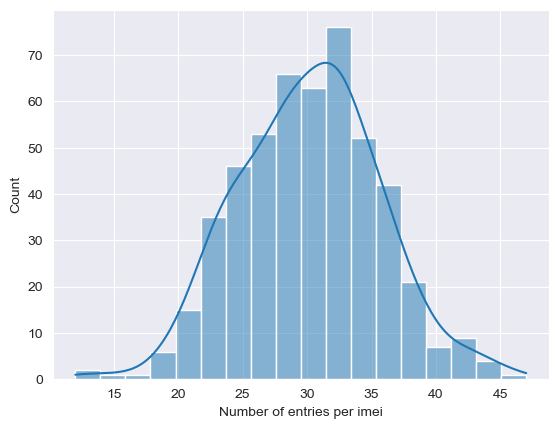

In [46]:
sns.histplot(imei_counts['connections'], kde=True)
plt.xlabel('Number of entries per imei')

Text(0.5, 0, 'Number of entries per imei')

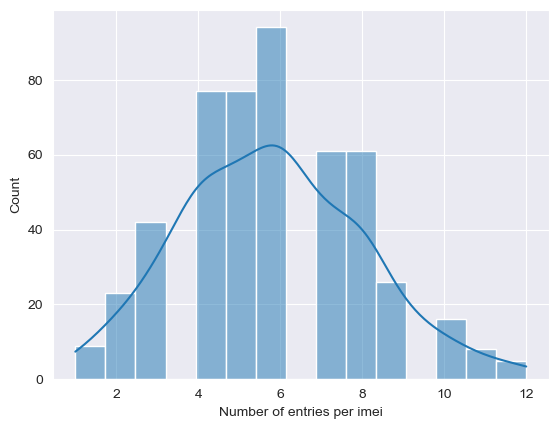

In [47]:
sns.histplot(imei_counts['devices'], kde=True)
plt.xlabel('Number of entries per imei')

Text(0.5, 0, 'Number of entries per imei')

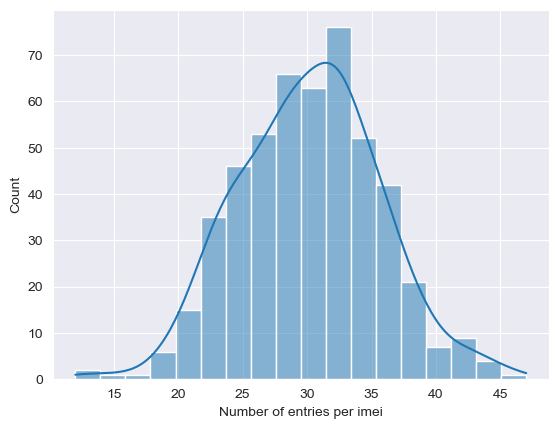

In [48]:
sns.histplot(imei_counts['processes'], kde=True)
plt.xlabel('Number of entries per imei')

Text(0.5, 0, 'Number of entries per imei')

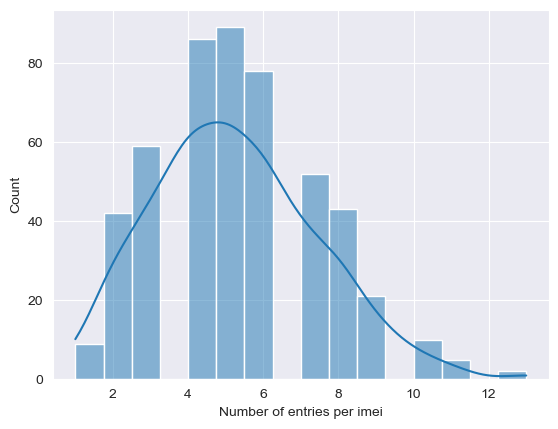

In [49]:
sns.histplot(imei_counts['profiles'], kde=True)
plt.xlabel('Number of entries per imei')

Distribution in tables connections and processes is normal, meaning not all devices have been tested the same amount of times. 
In profiles table, the distribution of imei is resembling normal, although slightly skewed, implying users have multiple devices. 
In table devices, the distribution is also normal, which is a problem, as imei should be unique per device.

# Phase 1-2


It looks like processes and connections have the same length and the same values in the columns ts, imei, mwra in respective rows. Let's check if this is true.

In [83]:
(connections[['ts', 'imei', 'mwra']] == processes[['ts', 'imei', 'mwra']]).all().all() # .all().all() checks if all values across both dimensions are True

True

Previous cell has confirmed our suspicion, that these were the same snapshots. We can now join the tables

In [92]:
actions = processes.join(connections.drop(columns=['ts', 'imei', 'mwra']), how='inner')

In [109]:
actions['imei'].nunique(), processes['imei'].nunique(), connections['imei'].nunique()

(500, 500, 500)

In [108]:
devices['imei'].nunique()

499

In [113]:
# check what imei is in actions but not in devices
actions['imei'].isin(devices['imei']).all()
# get the false value
actions['imei'][~actions['imei'].isin(devices['imei'])]

447      3590433799317662055
475      3590433799317662055
837      3590433799317662055
1124     3590433799317662055
1326     3590433799317662055
1548     3590433799317662055
1872     3590433799317662055
2237     3590433799317662055
2918     3590433799317662055
5308     3590433799317662055
5730     3590433799317662055
6039     3590433799317662055
6103     3590433799317662055
7066     3590433799317662055
7311     3590433799317662055
7338     3590433799317662055
8631     3590433799317662055
9257     3590433799317662055
9319     3590433799317662055
9684     3590433799317662055
9900     3590433799317662055
10181    3590433799317662055
10576    3590433799317662055
10611    3590433799317662055
10641    3590433799317662055
11774    3590433799317662055
11995    3590433799317662055
12168    3590433799317662055
12869    3590433799317662055
13017    3590433799317662055
13766    3590433799317662055
13857    3590433799317662055
14117    3590433799317662055
14892    3590433799317662055
Name: imei, dt